In [1]:
import requests
import geopandas as gpd
from shapely.geometry import shape
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely import wkt
from shapely.geometry import JOIN_STYLE
import matplotlib.pyplot as plt 

## Data Import

**To find the URL path to the deepstatemap API do the following:**
1. Open **developer tools** (inspect)
2. Go to the **network tab** to see the rquests made by the webpage
3. Reload the page to trigger data requests
4. Filter requests by **Fetch/XHR**
5. Check some filtered requests, with active preview tab, to find the one which contains **feature** or **geometry** keys
6. Right-click on the request name and choose **Open in new tab** > **Pretty-print** to verify if it is the correct request.
7. Copy the URL **https://deepstatemap.live/api/history/last**

In [2]:
url = 'https://deepstatemap.live/api/history/last'

In [3]:
# Store the response and check if the status code is 200
response = requests.get(url)
response.status_code

200

In [4]:
# Encode the response into a json format and check keys
deep_state_data_raw = response.json()
deep_state_data_raw.keys()

dict_keys(['id', 'map', 'datetime'])

In [5]:
deep_state_data_raw['map'].keys()

dict_keys(['type', 'features'])

In [6]:
# Retrieve a sample with some geospatial data
for f in deep_state_data_raw['map']['features']:
  print(f)
  break

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[35.4988711, 47.5108643, 0], [35.5094445, 47.5069227, 0], [35.5152972, 47.512315, 0], [35.539021, 47.519038, 0], [35.5479326, 47.52628, 0], [35.5672797, 47.5284839, 0], [35.592551, 47.519323, 0], [35.6131342, 47.5043006, 0], [35.6161569, 47.5043081, 0], [35.6165026, 47.5062368, 0], [35.6211815, 47.507665, 0], [35.6236289, 47.5058463, 0], [35.6369349, 47.5109636, 0], [35.6408407, 47.5074928, 0], [35.6329032, 47.502978, 0], [35.6346285, 47.5004876, 0], [35.654663, 47.500962, 0], [35.6704842, 47.5022091, 0], [35.6870634, 47.5097609, 0], [35.6995239, 47.506848, 0], [35.7115039, 47.505541, 0], [35.70555, 47.5109315, 0], [35.692178, 47.5118843, 0], [35.682358, 47.510877, 0], [35.665363, 47.503572, 0], [35.656037, 47.504789, 0], [35.6501519, 47.5122452, 0], [35.6322479, 47.5166856, 0], [35.6101721, 47.5121134, 0], [35.595024, 47.523373, 0], [35.572193, 47.531951, 0], [35.51, 47.528718, 0], [35.479216, 47.526399, 0], [35.4769

In [7]:
# Display name and geometry separately
for f in deep_state_data_raw['map']['features']:
  geom = f['geometry']
  name = f['properties']['name']
  print(name)
  print(geom)
  break

Статус невідомий /// Unknown status /// geoJSON.status.unknown
{'type': 'Polygon', 'coordinates': [[[35.4988711, 47.5108643, 0], [35.5094445, 47.5069227, 0], [35.5152972, 47.512315, 0], [35.539021, 47.519038, 0], [35.5479326, 47.52628, 0], [35.5672797, 47.5284839, 0], [35.592551, 47.519323, 0], [35.6131342, 47.5043006, 0], [35.6161569, 47.5043081, 0], [35.6165026, 47.5062368, 0], [35.6211815, 47.507665, 0], [35.6236289, 47.5058463, 0], [35.6369349, 47.5109636, 0], [35.6408407, 47.5074928, 0], [35.6329032, 47.502978, 0], [35.6346285, 47.5004876, 0], [35.654663, 47.500962, 0], [35.6704842, 47.5022091, 0], [35.6870634, 47.5097609, 0], [35.6995239, 47.506848, 0], [35.7115039, 47.505541, 0], [35.70555, 47.5109315, 0], [35.692178, 47.5118843, 0], [35.682358, 47.510877, 0], [35.665363, 47.503572, 0], [35.656037, 47.504789, 0], [35.6501519, 47.5122452, 0], [35.6322479, 47.5166856, 0], [35.6101721, 47.5121134, 0], [35.595024, 47.523373, 0], [35.572193, 47.531951, 0], [35.51, 47.528718, 0], [35.

In [8]:
# Convert geomerty data into a shapely object
for f in deep_state_data_raw['map']['features']:
  geom = f['geometry']
  print(shape(geom))
  break

POLYGON Z ((35.4988711 47.5108643 0, 35.5094445 47.5069227 0, 35.5152972 47.512315 0, 35.539021 47.519038 0, 35.5479326 47.52628 0, 35.5672797 47.5284839 0, 35.592551 47.519323 0, 35.6131342 47.5043006 0, 35.6161569 47.5043081 0, 35.6165026 47.5062368 0, 35.6211815 47.507665 0, 35.6236289 47.5058463 0, 35.6369349 47.5109636 0, 35.6408407 47.5074928 0, 35.6329032 47.502978 0, 35.6346285 47.5004876 0, 35.654663 47.500962 0, 35.6704842 47.5022091 0, 35.6870634 47.5097609 0, 35.6995239 47.506848 0, 35.7115039 47.505541 0, 35.70555 47.5109315 0, 35.692178 47.5118843 0, 35.682358 47.510877 0, 35.665363 47.503572 0, 35.656037 47.504789 0, 35.6501519 47.5122452 0, 35.6322479 47.5166856 0, 35.6101721 47.5121134 0, 35.595024 47.523373 0, 35.572193 47.531951 0, 35.51 47.528718 0, 35.479216 47.526399 0, 35.4769521 47.5118862 0, 35.4745488 47.5044651 0, 35.4611598 47.5021141 0, 35.4523631 47.5066031 0, 35.4376853 47.5059948 0, 35.4320211 47.5070964 0, 35.4203698 47.5093643 0, 35.4197045 47.5197047 

In [9]:
# Remove z coordinate
for f in deep_state_data_raw['map']['features']:
  geom_z = f['geometry']
  geom = wkt.loads(wkt.dumps(shape(geom), output_dimension=2))  # Geopandas wkt is used here to remove z coord
  print()
  break

In [10]:
# Populate list with the modified data (dictionaries)
geo_list = []
for f in deep_state_data_raw['map']['features']:
  geom = f['geometry']
  name = f['properties']['name']
  new_feature = {
      "name":name,
      "geometry":wkt.loads(wkt.dumps(shape(geom), output_dimension=2))
      }

  geo_list.append(new_feature)

In [11]:
len(geo_list)

456

In [12]:
# Print a few lines of the new dictionary
for index, item in enumerate(geo_list):
  if index < 20:
    print(item)

{'name': 'Статус невідомий /// Unknown status /// geoJSON.status.unknown', 'geometry': <POLYGON ((35.499 47.511, 35.509 47.507, 35.515 47.512, 35.539 47.519, 35.54...>}
{'name': 'Статус невідомий /// Unknown status\xa0/// geoJSON.status.unknown', 'geometry': <POLYGON ((38.064 49.101, 38.077 49.114, 38.081 49.124, 38.084 49.134, 38.07...>}
{'name': 'Статус невідомий /// Unknown status /// geoJSON.status.unknown', 'geometry': <POLYGON ((36.087 47.574, 36.106 47.579, 36.117 47.578, 36.128 47.575, 36.13...>}
{'name': 'Статус невідомий /// Unknown status\xa0/// geoJSON.status.unknown', 'geometry': <POLYGON ((37.591 48.066, 37.598 48.071, 37.591 48.077, 37.586 48.079, 37.57...>}
{'name': 'Статус невідомий /// Unknown status\xa0/// geoJSON.status.unknown\n', 'geometry': <POLYGON ((36.944 47.773, 36.93 47.758, 36.905 47.758, 36.89 47.754, 36.854 ...>}
{'name': 'Статус невідомий /// Unknown status\xa0/// geoJSON.status.unknown\n', 'geometry': <POLYGON ((35.793 47.465, 35.791 47.454, 35.798 47.4

In [13]:
# Split the name by '///' and take the first part
def extract_first_part(name, part=0):
    first_part = name.split('///')[part].strip()
    return first_part

In [14]:
# Check if it correctly retrieves the name in Ukrainian
for n in geo_list:
  print(extract_first_part(n['name']))
  break

Статус невідомий


In [15]:
# Check if it correctly retrieves the name in English
for n in geo_list:
  print(extract_first_part(n['name'], part=1))
  break

Unknown status


In [16]:
# Apply the function to all 'name' values
for item in geo_list:
  item['name'] = extract_first_part(item['name'], part=1)

print(geo_list[0])

{'name': 'Unknown status', 'geometry': <POLYGON ((35.499 47.511, 35.509 47.507, 35.515 47.512, 35.539 47.519, 35.54...>}


<Axes: >

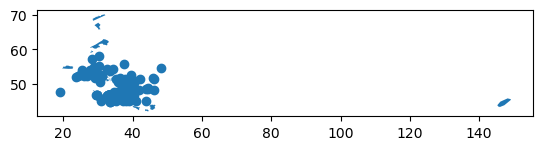

In [17]:
# Plot the data
gpd.GeoDataFrame(geo_list).plot()

## GeoDataFrame Cleaning

In [18]:
# Convert list of dictionaries into GeoDataFrame, and display some info
raw_deepstatemap_gdf = gpd.GeoDataFrame(geo_list)
print(raw_deepstatemap_gdf.crs, end='\n\n')
print(raw_deepstatemap_gdf.geom_type.value_counts(), end='\n\n')
print(raw_deepstatemap_gdf.isna().all(), end='\n\n')
print(raw_deepstatemap_gdf.is_empty.any())

None

Point      354
Polygon    102
Name: count, dtype: int64

name        False
geometry    False
dtype: bool

False


In [19]:
# Set WSG84 (4326) as a coordinate reference system
raw_deepstatemap_gdf = raw_deepstatemap_gdf.set_crs(4326)
raw_deepstatemap_gdf.crs.srs

'EPSG:4326'

In [20]:
raw_deepstatemap_gdf.head()

,name,geometry
0,Unknown status,"POLYGON ((35.49887 47.51086, 35.50944 47.50692..."
1,Unknown status,"POLYGON ((38.06427 49.10085, 38.07728 49.11434..."
2,Unknown status,"POLYGON ((36.08736 47.57385, 36.10572 47.5785,..."
3,Unknown status,"POLYGON ((37.59088 48.06616, 37.59795 48.07135..."
4,Unknown status,"POLYGON ((36.94437 47.77302, 36.92969 47.75837..."


In [21]:
# Check if filtering by Polygon type retrieves the same n of Polygons as seen before
raw_deepstatemap_gdf[raw_deepstatemap_gdf.geometry.apply(lambda x: isinstance(x, Polygon))].count()

name        102
geometry    102
dtype: int64

In [22]:
# Apply filter to gdf
deepstatemap_gdf = raw_deepstatemap_gdf[raw_deepstatemap_gdf.geometry.apply(lambda x: isinstance(x, Polygon))].copy()

<Axes: >

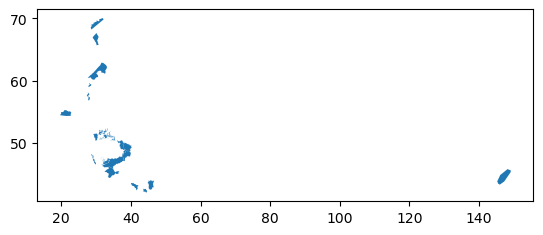

In [23]:
# Plot the filtered gdf
deepstatemap_gdf.plot()

In [24]:
# Search through name values for the occupied Ukrainian polygons
raw_deepstatemap_gdf['name'].unique()

array(['Unknown status', 'Liberated', 'Liberated 25.03',
       'Liberated 16.03-17.03', 'Liberated 23.03', 'Liberated 27-31.03',
       'Liberated 26.03', 'Liberated 27-29.03', 'Liberated 30.03',
       'Liberated 05.04', 'Liberated 31.03', 'Liberated 02.07',
       'Liberated 30.05', 'Snake Island', 'Liberated 26.06',
       'Liberated 04.09', 'Occupied Petsamo', 'Occupied Salla',
       'occupied Estonia territories.',
       'Occupied Pechorsky district (Saaste Boot).',
       'Occupied Latvia territories.', 'Occupied Southern Kuril islands.',
       'Liberated 31.03 - 02.04', 'Transnistria',
       'Occupied Tskhinvali district', 'Occupied Tuzla Island',
       'CADR and CALR', 'Occupied', 'Occupied Crimea',
       'East Prussia is temporarily occupied.', 'Occupied Abkhazia.',
       'The temporarily occupied territory of Karelia.',
       'The temporarily occupied territory of the Republic of Ichkeria.',
       'Russian cruiser Moskva', 'Direction of attack', 'Kyiv', 'Minsk',
   

<Axes: >

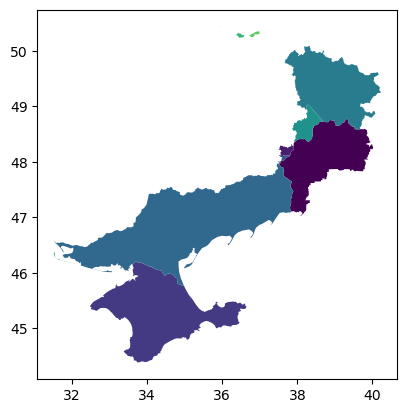

In [25]:
# Plot the occupied areas
deepstatemap_gdf[deepstatemap_gdf['name'].isin(['CADR and CALR', 'Occupied', 'Occupied Crimea'])].plot(cmap='viridis')

In [26]:
# Store data as a new gdf
occupied_ua_gdf_raw = deepstatemap_gdf[deepstatemap_gdf['name'].isin(['CADR and CALR', 'Occupied', 'Occupied Crimea'])].copy().reset_index()
occupied_ua_gdf_raw.shape

(13, 3)

## Data Freshness Verification

I will compare recent changes in the warzone to the ones present here. 

For this, some random coordinates (wgs84 by default at DeepStateMap) of the newly occupied territory will be used.  

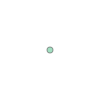

In [27]:
_latest_rus_advance = Point(37.50500679016114, 48.21177662359289)
_latest_rus_advance

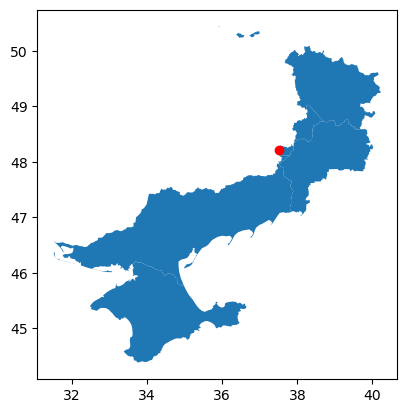

In [28]:
# Display the point on top of the occupied area
fig,ax = plt.subplots()
occupied_ua_gdf_raw.plot(ax=ax)
ax.scatter(_latest_rus_advance.x, _latest_rus_advance.y, color='red', marker='o');

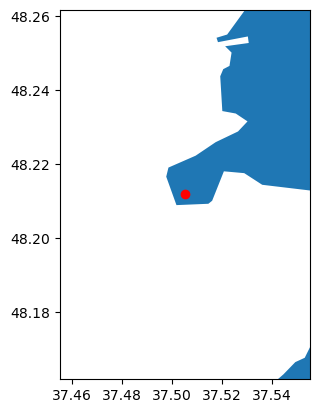

In [29]:
# Set the zoom level around the point
fig,ax = plt.subplots()
occupied_ua_gdf_raw.plot(ax=ax)
ax.scatter(_latest_rus_advance.x, _latest_rus_advance.y, color='red', marker='o')

buffer = 0.05  # Lower value = higher zoom
ax.set_xlim(_latest_rus_advance.x - buffer, _latest_rus_advance.x + buffer)
ax.set_ylim(_latest_rus_advance.y - buffer, _latest_rus_advance.y + buffer)
plt.show()

There is visual confirmation that it lies within the recently (today) occupied territory.

Next, I will also perform a check using a more programmatic way, with the help of **.contains()** method.

In [30]:
# Return true if point is within captured area, i.e the data is up to date
occupied_ua_gdf_raw.contains(_latest_rus_advance).any()

True

## Polygons Merge

In [31]:
# Merge all polygons into a single multipolygon
occupied_ua_gsr = gpd.GeoSeries(occupied_ua_gdf_raw.union_all(), crs=4326)
occupied_ua_gsr

0    MULTIPOLYGON (((35.20146 45.52334, 35.31126 45...
dtype: geometry

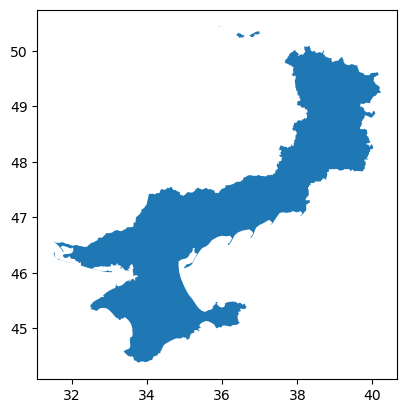

In [32]:
occupied_ua_gsr.plot();

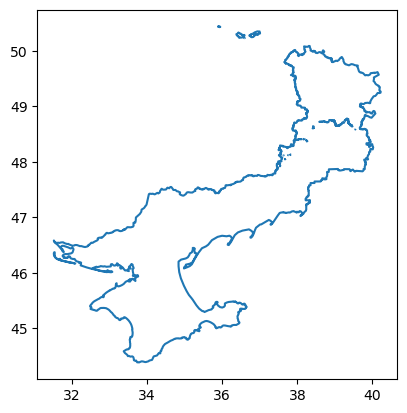

In [33]:
# Check for artifacts which are often present after applying union
occupied_ua_gsr.boundary.plot();

## Artifacts Removal

Artifacts can be seen within the geometry above. Here is a solution that might work:

https://gis.stackexchange.com/questions/277334/shapely-polygon-union-results-in-strange-artifacts-of-tiny-non-overlapping-area

The warning can be ignored, since buffer is not used for any precise calculation here.

C:\Users\rosty\AppData\Local\Temp\ipykernel_7688\2329887646.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  .buffer(eps, 1, join_style=JOIN_STYLE.mitre)
C:\Users\rosty\AppData\Local\Temp\ipykernel_7688\2329887646.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  .buffer(-eps, 1, join_style=JOIN_STYLE.mitre)


<Axes: >

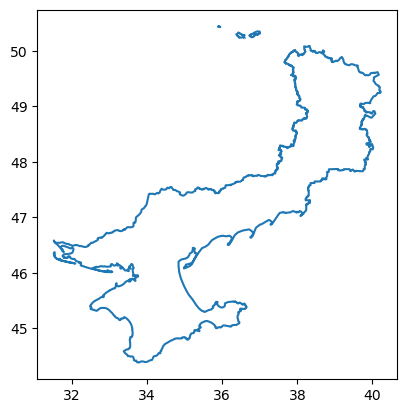

In [34]:
eps = 0.000009
(
    occupied_ua_gsr
    .buffer(eps, 1, join_style=JOIN_STYLE.mitre)
    .buffer(-eps, 1, join_style=JOIN_STYLE.mitre)
    .boundary
    .plot()
    )

In [ ]:
# Applying buffer to remove union artifacts
eps = 0.000009

occupied_ua = (
    occupied_ua_gsr
    .buffer(eps, 1, join_style=JOIN_STYLE.mitre)
    .buffer(-eps, 1, join_style=JOIN_STYLE.mitre)
    .to_crs(4326)
    .copy()
    )

In [36]:
occupied_ua.crs.srs,occupied_ua_gsr.crs.srs

('EPSG:4326', 'EPSG:4326')

## Post-Manipulation Area Check

The use of buffer and its subsequent removal probably caused minor changes on the 'de-artifacted' polygon compared to the original one. So its better to check whether the difference is negligable or not. In case there is a large difference like 1% or even 0.01%, a lower **eps** has to be set.

Given that the random point I have chosen is near Donetsk, the respective coordinate system should be used for the calculations to be accurate.
 
https://epsg.io/9835

UCS-2000 / LCS-14 Donetsk >>> **EPSG: 9835**

In [39]:
%precision %f

# Check the % difference between geometries (the lower the better)
pct_diff = abs((occupied_ua.to_crs(9835).area.sum() - occupied_ua_gsr.to_crs(9835).area.sum()) / occupied_ua_gsr.to_crs(9835).area.sum()) * 100
pct_diff


0.000027

This small difference (**0.000027%**) suggests that the 'buffering' and 'debuffering' did not significantly alter the overall area of the multipolygon.

In [38]:
# Export to GeoJSON
occupied_ua.to_crs(4326).to_file("occupied-areas-ua.geojson", driver="GeoJSON")